# Russel 2000 日足 メディアン統計

In [1]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf

from funcs.technical import calc_robust_bollinger

code = 'RUT'
symbol = '^%s' % code
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='1y', interval='1d')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-03-20 00:00:00-04:00,2030.380005,2081.330078,2028.560059,2074.879883,4064850000,0.0,0.0
2024-03-21 00:00:00-04:00,2087.850098,2106.310059,2087.850098,2098.560059,4207730000,0.0,0.0
2024-03-22 00:00:00-04:00,2098.030029,2099.110107,2071.790039,2072.000000,3374700000,0.0,0.0
2024-03-25 00:00:00-04:00,2075.060059,2088.479980,2074.159912,2074.159912,3331360000,0.0,0.0
2024-03-26 00:00:00-04:00,2083.439941,2093.520020,2070.000000,2070.159912,3871790000,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-13 00:00:00-04:00,2026.079956,2031.160034,1984.920044,1993.689941,5018980000,0.0,0.0
2025-03-14 00:00:00-04:00,2008.530029,2044.510010,2008.530029,2044.099976,4863180000,0.0,0.0
2025-03-17 00:00:00-04:00,2041.520020,2073.919922,2039.959961,2068.330078,5031770000,0.0,0.0


In [3]:
df0 = ticker.history(period='3y', interval='1d')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-21 00:00:00-04:00,2085.820068,2093.379883,2054.780029,2065.939941,4869820000,0.0,0.0
2022-03-22 00:00:00-04:00,2066.919922,2097.610107,2066.919922,2088.340088,4754840000,0.0,0.0
2022-03-23 00:00:00-04:00,2086.699951,2086.699951,2051.449951,2052.209961,4550670000,0.0,0.0
2022-03-24 00:00:00-04:00,2054.100098,2075.489990,2047.270020,2075.439941,4131390000,0.0,0.0
2022-03-25 00:00:00-04:00,2075.889893,2081.320068,2064.199951,2077.979980,4305020000,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-13 00:00:00-04:00,2026.079956,2031.160034,1984.920044,1993.689941,5018980000,0.0,0.0
2025-03-14 00:00:00-04:00,2008.530029,2044.510010,2008.530029,2044.099976,4863180000,0.0,0.0
2025-03-17 00:00:00-04:00,2041.520020,2073.919922,2039.959961,2068.330078,5031770000,0.0,0.0


## Moving Median

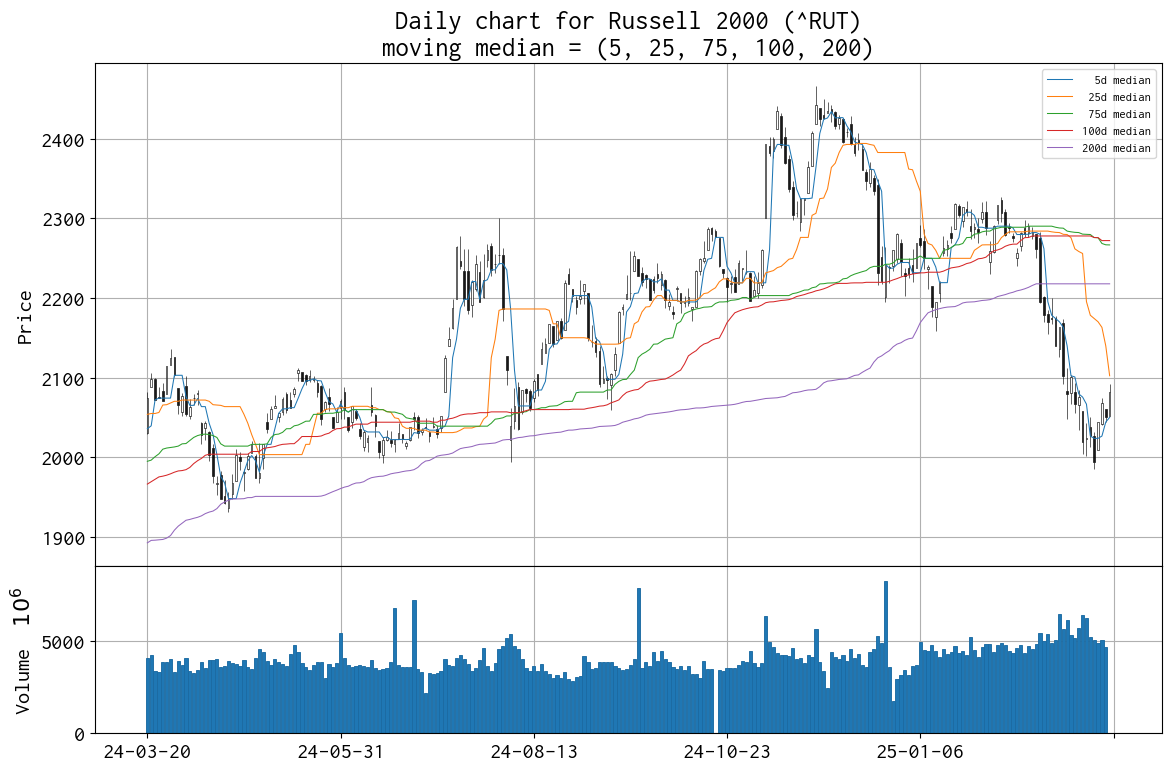

In [4]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

mm005 = df0['Close'].rolling(5).median()
mm025 = df0['Close'].rolling(25).median()
mm075 = df0['Close'].rolling(75).median()
mm100 = df0['Close'].rolling(100).median()
mm200 = df0['Close'].rolling(200).median()

apds  = [
    mpf.make_addplot(mm005[df.index], width=0.75, label='  5d median', ax=ax[0]),
    mpf.make_addplot(mm025[df.index], width=0.75, label=' 25d median', ax=ax[0]),
    mpf.make_addplot(mm075[df.index], width=0.75, label=' 75d median', ax=ax[0]),
    mpf.make_addplot(mm100[df.index], width=0.75, label='100d median', ax=ax[0]),
    mpf.make_addplot(mm200[df.index], width=0.75, label='200d median', ax=ax[0]),
]   

mpf.plot(
    df, type='candle', style='default',
    volume=ax[1],
    datetime_format='%y-%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax[0],
)
ax[0].set_title('Daily chart for %s (%s)\nmoving median = (5, 25, 75, 100, 200)' %(ticker.info['longName'], symbol))
ax[0].legend(loc='best', fontsize=9)

plt.tight_layout()
plt.savefig('report_daily_chart_median_%s.png' % code)
plt.show()

In [5]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-18 00:00:00-04:00,2060.969971,2060.969971,2043.869995,2049.939941,4666270000,0.0,0.0
2025-03-19 00:00:00-04:00,2051.277832,2092.031250,2051.277832,2082.076660,0,0.0,0.0


In [6]:
df.tail(2)['Close']

Date
2025-03-18 00:00:00-04:00    2049.939941
2025-03-19 00:00:00-04:00    2082.076660
Name: Close, dtype: float64

In [7]:
df.tail(2)['Close'].diff()

Date
2025-03-18 00:00:00-04:00          NaN
2025-03-19 00:00:00-04:00    32.136719
Name: Close, dtype: float64

In [8]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2025-03-19 00:00:00-04:00    30.798828
dtype: float64

In [9]:
df['Close'].rolling(9).median().tail()

Date
2025-03-13 00:00:00-04:00    2066.550049
2025-03-14 00:00:00-04:00    2044.099976
2025-03-17 00:00:00-04:00    2044.099976
2025-03-18 00:00:00-04:00    2044.099976
2025-03-19 00:00:00-04:00    2044.099976
Name: Close, dtype: float64

In [10]:
df['Close'].rolling(13).median().tail()

Date
2025-03-13 00:00:00-04:00    2079.530029
2025-03-14 00:00:00-04:00    2075.479980
2025-03-17 00:00:00-04:00    2068.330078
2025-03-18 00:00:00-04:00    2066.550049
2025-03-19 00:00:00-04:00    2066.550049
Name: Close, dtype: float64

In [11]:
df['Close'].rolling(26).median().tail()

Date
2025-03-13 00:00:00-04:00    2176.219971
2025-03-14 00:00:00-04:00    2172.125000
2025-03-17 00:00:00-04:00    2166.575073
2025-03-18 00:00:00-04:00    2151.364990
2025-03-19 00:00:00-04:00    2120.949951
Name: Close, dtype: float64

In [12]:
df['Close'].rolling(52).median().tail()

Date
2025-03-13 00:00:00-04:00    2260.079956
2025-03-14 00:00:00-04:00    2257.154907
2025-03-17 00:00:00-04:00    2257.154907
2025-03-18 00:00:00-04:00    2257.154907
2025-03-19 00:00:00-04:00    2257.154907
Name: Close, dtype: float64

## Robust Bollinger's bands

In [13]:
period = 20
calc_robust_bollinger(df0, period)
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Median,Q1,Q3,Lower,Upper
Date,,,,,,,,,,,,
2022-03-21 00:00:00-04:00,2085.820068,2093.379883,2054.780029,2065.939941,4869820000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2022-03-22 00:00:00-04:00,2066.919922,2097.610107,2066.919922,2088.340088,4754840000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2022-03-23 00:00:00-04:00,2086.699951,2086.699951,2051.449951,2052.209961,4550670000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2022-03-24 00:00:00-04:00,2054.100098,2075.489990,2047.270020,2075.439941,4131390000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2022-03-25 00:00:00-04:00,2075.889893,2081.320068,2064.199951,2077.979980,4305020000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-13 00:00:00-04:00,2026.079956,2031.160034,1984.920044,1993.689941,5018980000,0.0,0.0,2166.575073,2078.517517,2257.352417,1810.265167,2525.604767
2025-03-14 00:00:00-04:00,2008.530029,2044.510010,2008.530029,2044.099976,4863180000,0.0,0.0,2151.364990,2073.247498,2211.947571,1865.197388,2419.997681
2025-03-17 00:00:00-04:00,2041.520020,2073.919922,2039.959961,2068.330078,5031770000,0.0,0.0,2120.949951,2060.937531,2182.540039,1878.533768,2364.943802


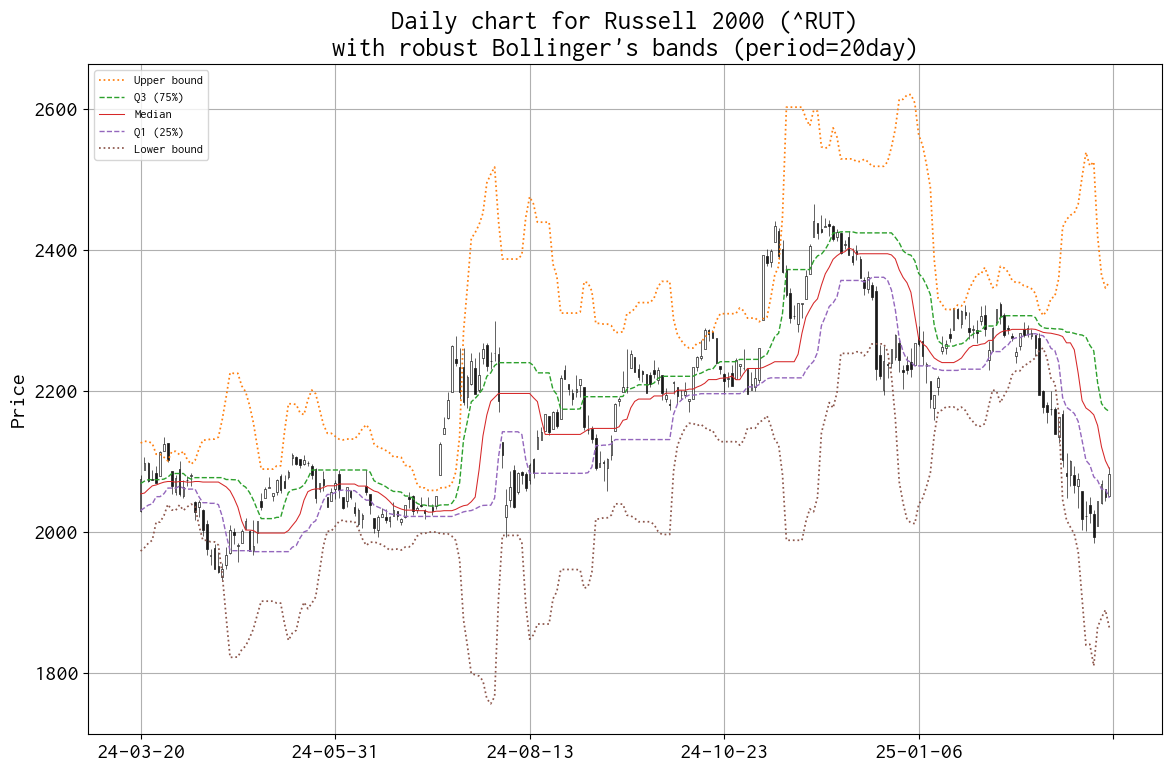

In [14]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))

# Bollinger bands
mv_median = df0['Median']
mv_q1 = df0['Q1']
mv_q3 = df0['Q3']
mv_lower = df0['Lower']
mv_upper = df0['Upper']

apds  = [
    mpf.make_addplot(mv_upper[df.index], width=1.25, color='C1', linestyle='dotted', label='Upper bound', ax=ax),
    mpf.make_addplot(mv_q3[df.index], width=1, color='C2', linestyle='dashed', label='Q3 (75%)', ax=ax),
    mpf.make_addplot(mv_median[df.index], width=0.75, color='C3', label='Median', ax=ax),
    mpf.make_addplot(mv_q1[df.index], width=1, color='C4', linestyle='dashed', label='Q1 (25%)', ax=ax),
    mpf.make_addplot(mv_lower[df.index], width=1.25, color='C5', linestyle='dotted', label='Lower bound', ax=ax),
]   

mpf.plot(
    df, type='candle', style='default',
    addplot=apds,
    datetime_format='%y-%m-%d',
    xrotation=0,
    ax=ax,
)

ax.grid()
ax.legend(loc='best', fontsize=9)

try:
    ax.set_title('Daily chart for %s (%s)\nwith robust Bollinger\'s bands (period=%dday)' % (ticker.info['longName'], symbol, period))
except KeyError:
    ax.set_title('Daily chart for %s\nwith robust Bollinger\'s bands (period=%dday)' % (symbol, period))

plt.tight_layout()
plt.savefig('report_daily_chart_bollinger_robust_%s.png' % code)
plt.show()

## ヒストグラム

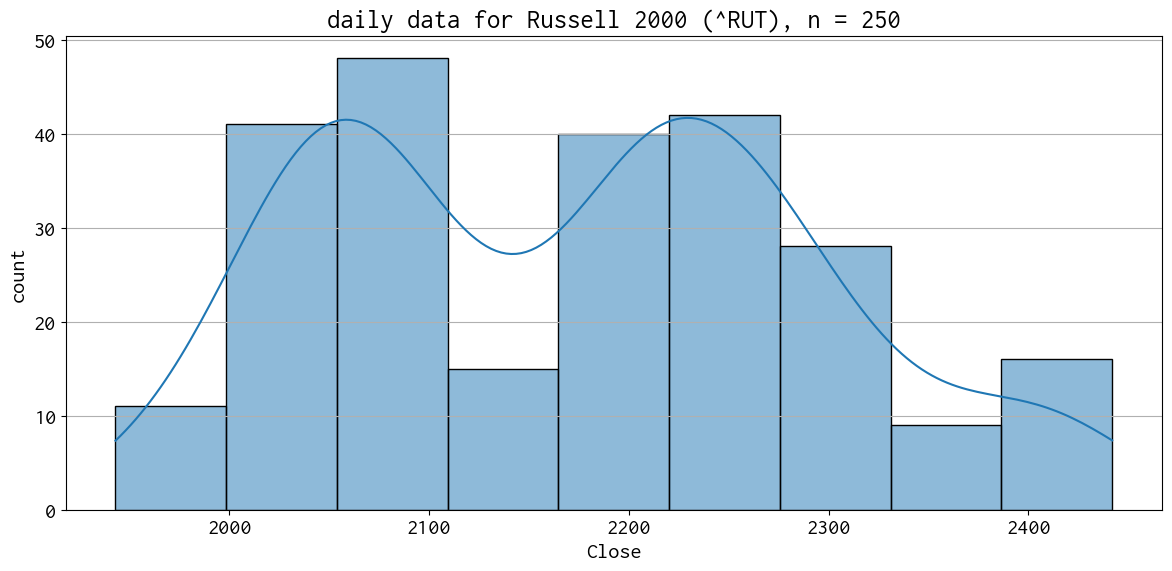

In [15]:
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

sns.histplot(
    df['Close'],
    kde=True,
    ax=ax
)

ax.set_xlabel("Close")
ax.set_ylabel("count")
ax.set_title('daily data for %s (%s), n = %d' % (ticker.info['longName'], symbol, len(df)))
ax.grid(axis = 'y')

plt.tight_layout()
plt.savefig('report_daily_histogram_%s.png' % code)
plt.show()